In [7]:
import json
import matplotlib.pyplot as plt
from collections import Counter

import os
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



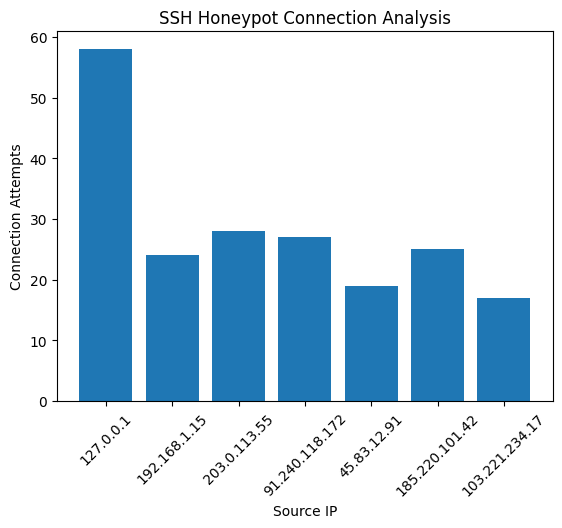

In [8]:
with open("ssh_logs.json", "r") as f:
    logs = json.load(f)

ips = [log["source_ip"] for log in logs]
ip_count = Counter(ips)

plt.bar(ip_count.keys(), ip_count.values())
plt.xticks(rotation=45)
plt.xlabel("Source IP")
plt.ylabel("Connection Attempts")
plt.title("SSH Honeypot Connection Analysis")
plt.show()

In [9]:
LOG_FILE = r"C:\Users\lenovo\Desktop\port-intel\ssh_logs.json"

if not os.path.exists(LOG_FILE):
    raise FileNotFoundError("ssh_logs.json not found")

with open(LOG_FILE, "r") as f:
    logs = json.load(f)

print("Total events:", len(logs))


Total events: 198


In [10]:
# Convert IPs to numeric labels
unique_ips = list(set(log["source_ip"] for log in logs))
ip_to_num = {ip: i for i, ip in enumerate(unique_ips)}

x_ips = [ip_to_num[log["source_ip"]] for log in logs]
y_time = list(range(len(logs)))   # event order (time progression)
z_ports = [log["destination_port"] for log in logs]


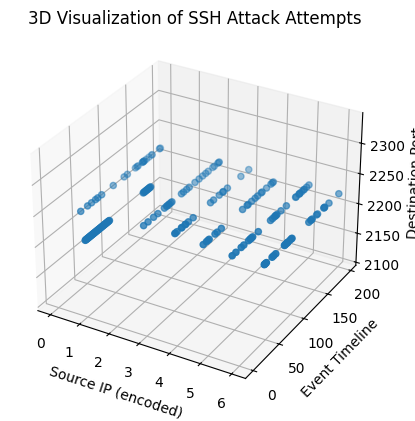

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_ips, y_time, z_ports)

ax.set_xlabel("Source IP (encoded)")
ax.set_ylabel("Event Timeline")
ax.set_zlabel("Destination Port")

ax.set_title("3D Visualization of SSH Attack Attempts")

plt.show()
